## 简单线性回归（最小二乘法）



In [35]:
### 0.引入依赖
import numpy as np
import matplotlib.pyplot as plt

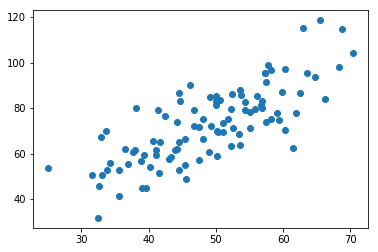

In [36]:
### 1.导入数据（data.csv） 
points = np.genfromtxt( "data.csv", delimiter="," )
# points

# 提取points里面的两列数据为X，Y
x = points[:, 0]
y = points[:, 1]

# 调用plt画出散点图
plt.scatter( x, y )
plt.show()

In [46]:
### 2.定义损失函数（损失函数是系数的函数，传入数据）
def compute_cost( w, b, points ):
    total_cost = 0
    M = len( points )
    
    # 逐点计算平方损失误差，然后求平均值
    for i in range( M ):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += ( y - w * x -b ) ** 2
    
    return total_cost / M

In [47]:
### 3.定义算法拟合函数

#先定义一个求平均值的函数
def average( data ):
    sum = 0
    num = len( data )
    for i in range( num ):
        sum += data[i]
    return sum / num

# 定义核心拟合函数
def fit( points ):
    M = len( points )
    x_bar = average( points[:, 0] )
    
    sum_yx = 0
    sum_x2 = 0 
    sum_delta = 0
    
    for i in range( M ):
        x = points[i, 0]
        y = points[i, 1]
        sum_yx += y * ( x - x_bar )
        sum_x2 += x ** 2
        
    # 根据公式计算w
    w = sum_yx / ( sum_x2 - M *( x_bar**2 ) )
    
    for i in range( M ):
        x = points[i, 0]
        y = points[i, 1]
        sum_delta += ( y - w * x )
        
    b = sum_delta / M
    
    return w, b

In [48]:
### 4.测试
w, b = fit(points)

print("w is :", w)
print("b is :", b)

cost = compute_cost(w, b, points)

print("cost is :", cost)

w is : 1.3224310227553846
b is : 7.991020982269173
cost is : 110.25738346621313


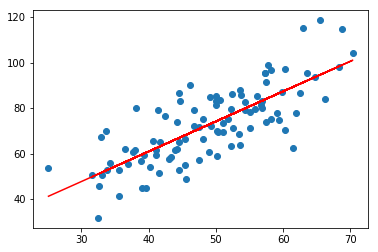

In [50]:
### 5.画出拟合曲线
plt.scatter(x, y)
# 针对每一个x,计算预测的y之
pred_y = w * x + b 

plt.plot(x, pred_y, c = "r")
plt.show()